# **Title**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import statsmodels.api as sm
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans

## EDA

In [ ]:
training_data = pd.read_csv("/content/train.csv")
training_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1001 non-null   object 
 1   Age                         1001 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 78.3+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
training_data.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
User_ID,0
Age,0
Gender,1
Platform,1
Daily_Usage_Time (minutes),1
Posts_Per_Day,1
Likes_Received_Per_Day,1
Comments_Received_Per_Day,1
Messages_Sent_Per_Day,1
Dominant_Emotion,1


In [ ]:
training_data[training_data.isna().any(axis=1)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
641,Tabii,işte mevcut veri kümesini 1000 satıra tamamlı...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
training_data.dropna(inplace = True, axis = 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
training_data.duplicated().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

In [ ]:
training_data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1000, 10)

In [ ]:
training_data["User_ID"].nunique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1000

In [ ]:
training_data.drop("User_ID", axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
training_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [ ]:
for i in training_data.columns:
    unique_values = sorted(training_data[i].unique())
    print(i, unique_values)
    print("\n")

Age ['21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', 'Female', 'Male', 'Non-binary']


Gender ['21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', 'Female', 'Male', 'Non-binary']


Platform ['Facebook', 'Instagram', 'LinkedIn', 'Snapchat', 'Telegram', 'Twitter', 'Whatsapp']


Daily_Usage_Time (minutes) [40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0, 105.0, 110.0, 115.0, 120.0, 125.0, 130.0, 140.0, 145.0, 150.0, 155.0, 160.0, 165.0, 170.0, 175.0, 180.0, 190.0, 200.0]


Posts_Per_Day [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]


Likes_Received_Per_Day [5.0, 6.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 17.0, 18.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 27.0, 28.0, 29.0, 30.0, 33.0, 35.0, 36.0, 37.0, 38.0, 40.0, 42.0, 43.0, 45.0, 48.0, 50.0, 55.0, 60.0, 65.0, 70.0, 72.0, 75.0, 78.0, 80.0, 83.0, 85.0, 88.0, 90.0, 95.0, 100.0, 105.0, 110.0]


Comments_Received_Per_Day [2.0, 3.0, 4.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
training_data[(training_data["Age"].isin(["Female", "Male", "Non-binary"]))]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
250,Male,27,Instagram,165.0,6.0,85.0,30.0,28.0,Happiness
251,Female,24,Twitter,75.0,3.0,33.0,18.0,19.0,Anger
252,Non-binary,29,Facebook,85.0,2.0,27.0,9.0,20.0,Neutral
253,Female,33,Instagram,145.0,4.0,65.0,23.0,35.0,Sadness
254,Male,31,LinkedIn,60.0,1.0,15.0,7.0,17.0,Anxiety
...,...,...,...,...,...,...,...,...,...
784,Male,22,Twitter,70.0,1.0,22.0,7.0,22.0,Neutral
785,Non-binary,29,Facebook,75.0,2.0,20.0,8.0,20.0,Boredom
786,Female,28,Whatsapp,100.0,4.0,37.0,14.0,26.0,Anxiety
787,Male,31,Telegram,85.0,3.0,45.0,20.0,28.0,Sadness


In [ ]:
training_data[(training_data["Gender"].isin(["21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34", "35"]))]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
250,Male,27,Instagram,165.0,6.0,85.0,30.0,28.0,Happiness
251,Female,24,Twitter,75.0,3.0,33.0,18.0,19.0,Anger
252,Non-binary,29,Facebook,85.0,2.0,27.0,9.0,20.0,Neutral
253,Female,33,Instagram,145.0,4.0,65.0,23.0,35.0,Sadness
254,Male,31,LinkedIn,60.0,1.0,15.0,7.0,17.0,Anxiety
...,...,...,...,...,...,...,...,...,...
784,Male,22,Twitter,70.0,1.0,22.0,7.0,22.0,Neutral
785,Non-binary,29,Facebook,75.0,2.0,20.0,8.0,20.0,Boredom
786,Female,28,Whatsapp,100.0,4.0,37.0,14.0,26.0,Anxiety
787,Male,31,Telegram,85.0,3.0,45.0,20.0,28.0,Sadness


In [ ]:
(training_data[(training_data["Age"].isin(["Female", "Male", "Non-binary"]))] == training_data[(training_data["Gender"].isin(["21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34", "35"]))]).sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Age,76
Gender,76
Platform,76
Daily_Usage_Time (minutes),76
Posts_Per_Day,76
Likes_Received_Per_Day,76
Comments_Received_Per_Day,76
Messages_Sent_Per_Day,76
Dominant_Emotion,76


In [ ]:
mask = training_data["Age"].isin(["Female", "Male", "Non-binary"])

training_data.loc[mask, ["Age", "Gender"]] = training_data.loc[mask, ["Gender", "Age"]].values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for i in training_data.columns:
    unique_values = sorted(training_data[i].unique())
    print(i, unique_values)
    print("\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Age ['21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35']


Gender ['Female', 'Male', 'Non-binary']


Platform ['Facebook', 'Instagram', 'LinkedIn', 'Snapchat', 'Telegram', 'Twitter', 'Whatsapp']


Daily_Usage_Time (minutes) [40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0, 105.0, 110.0, 115.0, 120.0, 125.0, 130.0, 140.0, 145.0, 150.0, 155.0, 160.0, 165.0, 170.0, 175.0, 180.0, 190.0, 200.0]


Posts_Per_Day [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]


Likes_Received_Per_Day [5.0, 6.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 17.0, 18.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 27.0, 28.0, 29.0, 30.0, 33.0, 35.0, 36.0, 37.0, 38.0, 40.0, 42.0, 43.0, 45.0, 48.0, 50.0, 55.0, 60.0, 65.0, 70.0, 72.0, 75.0, 78.0, 80.0, 83.0, 85.0, 88.0, 90.0, 95.0, 100.0, 105.0, 110.0]


Comments_Received_Per_Day [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 22.0, 23.0, 25.0, 26.0, 28.0

In [ ]:
training_data["Age"] =  training_data["Age"].astype(int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Plots


In [ ]:
gender_palette = {
    "Female": "#FFB6C1",
    "Male": "#ADD8E6",
    "Non-binary": "#D3D3D3"
}

platform_palette = {
    "Instagram": "#FFC0CB",
    "Twitter": "#ADD8E6",
    "Facebook": "#B0C4DE",
    "LinkedIn": "#B0E0E6",
    "Whatsapp": "#98FB98",
    "Telegram": "#AFEEEE",
    "Snapchat": "#FFFF99"
}

emotion_palette = {
    "Anger": "#FFB6C1",
    "Anxiety": "#FFEC8B",
    "Boredom": "#B0E57C",
    "Happiness": "#FFDAB9",
    "Neutral": "#BFE1EE",
    "Sadness": '#B0C4DE'
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Distribution Plots

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


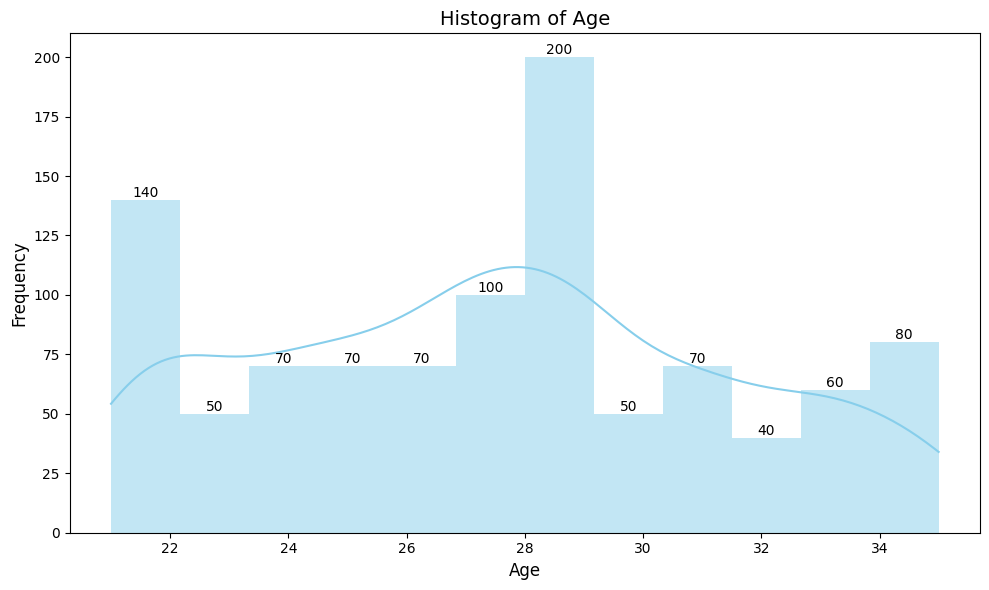

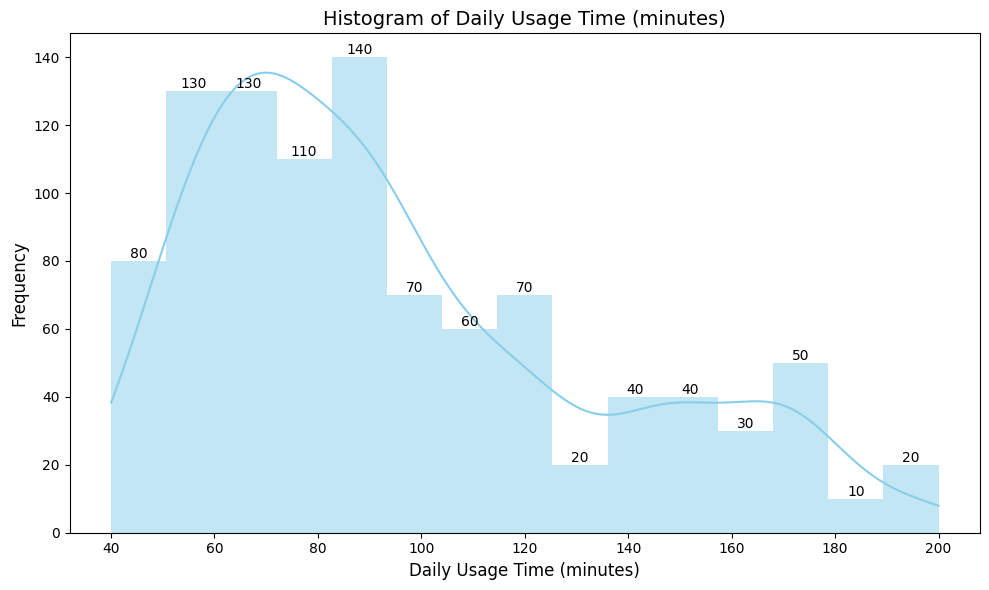

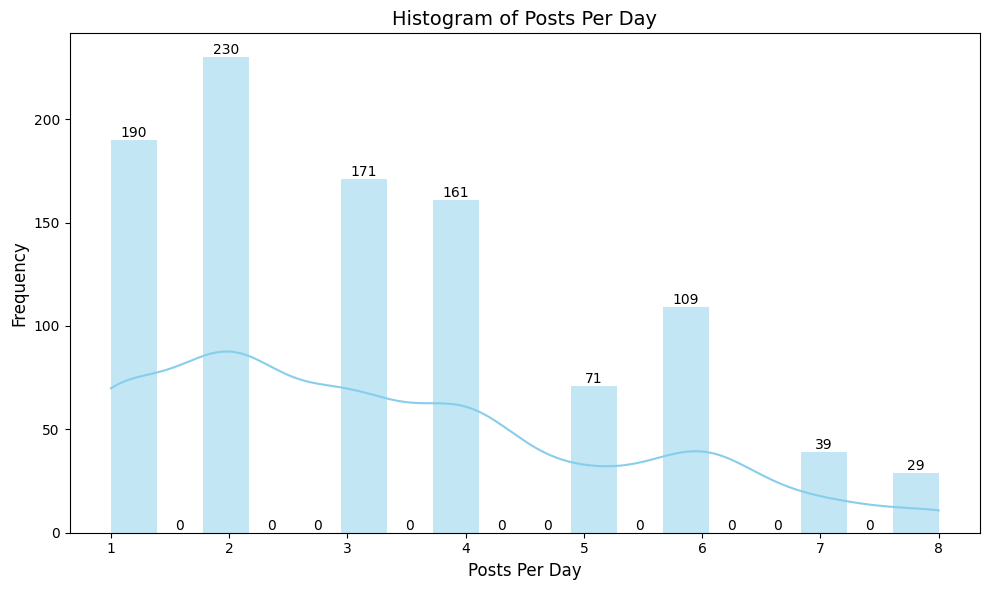

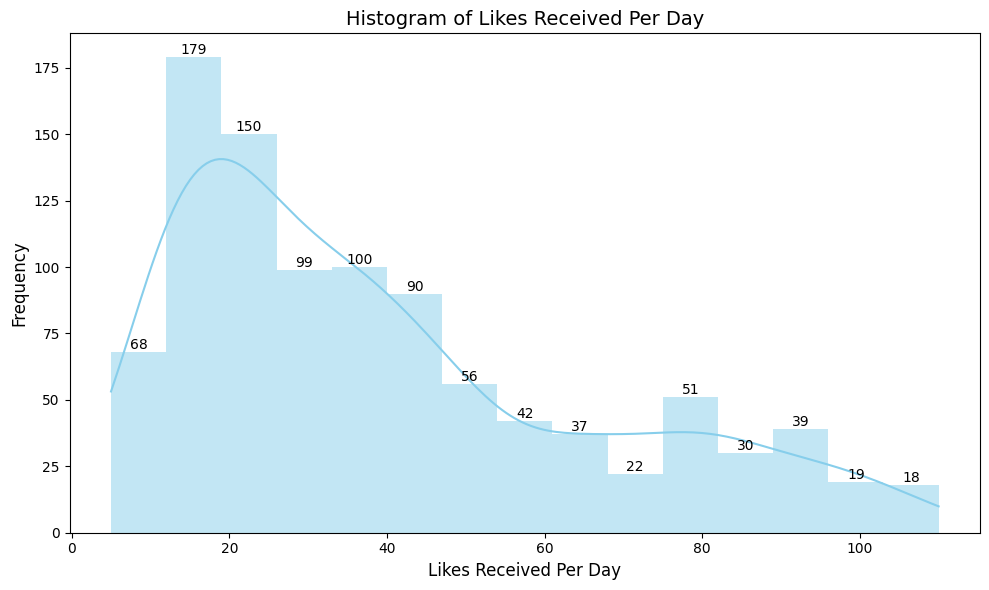

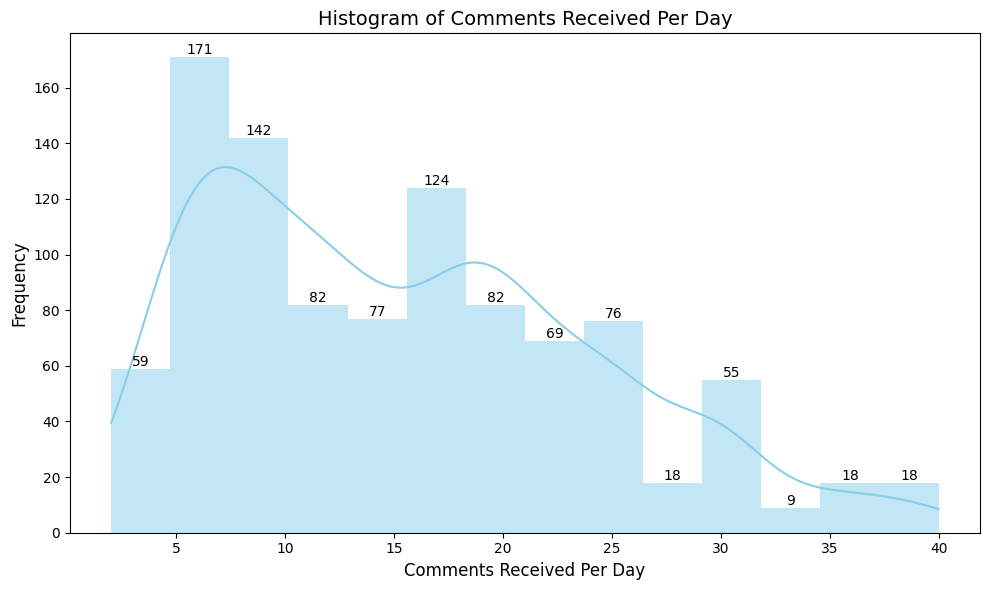

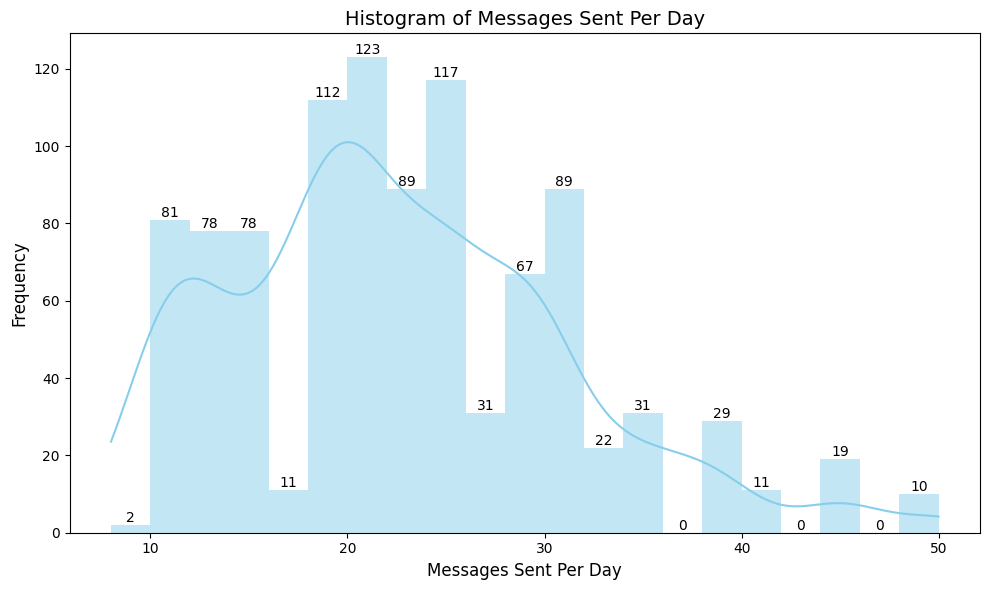

In [ ]:
numerical_columns = training_data.select_dtypes(include=["int", "float"]).columns.tolist()

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(training_data[col], kde=True, color="skyblue", linewidth=0)
    plt.title(f"Histogram of {col.replace('_', ' ')}", fontsize=14)
    plt.xlabel(col.replace('_', ' '), fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    ax.bar_label(ax.containers[0], fmt='%d', label_type='edge')
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


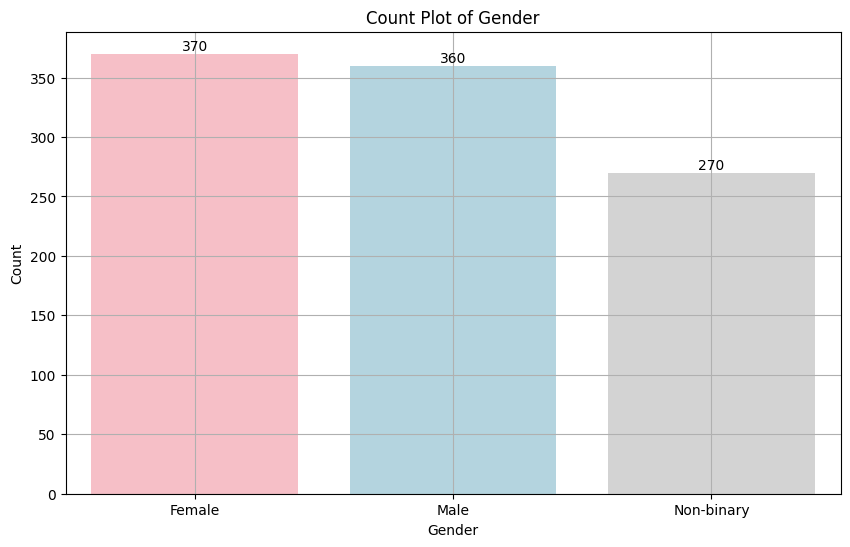

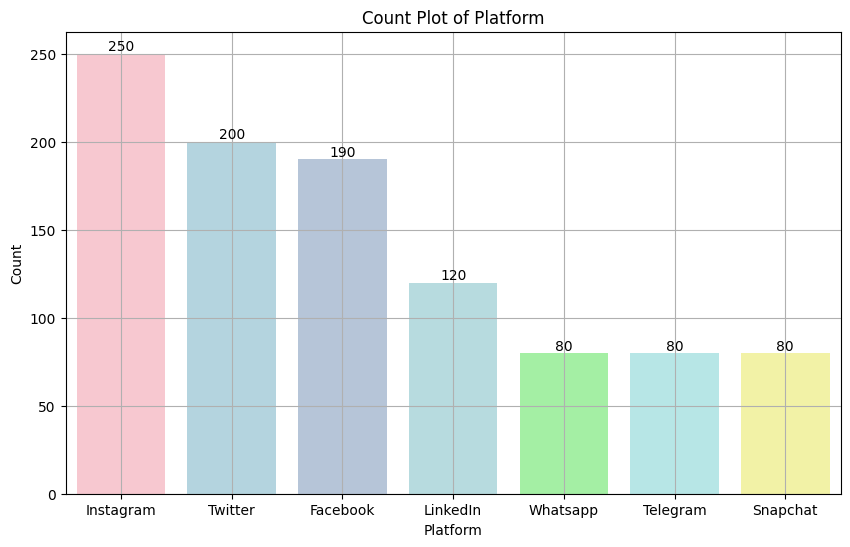

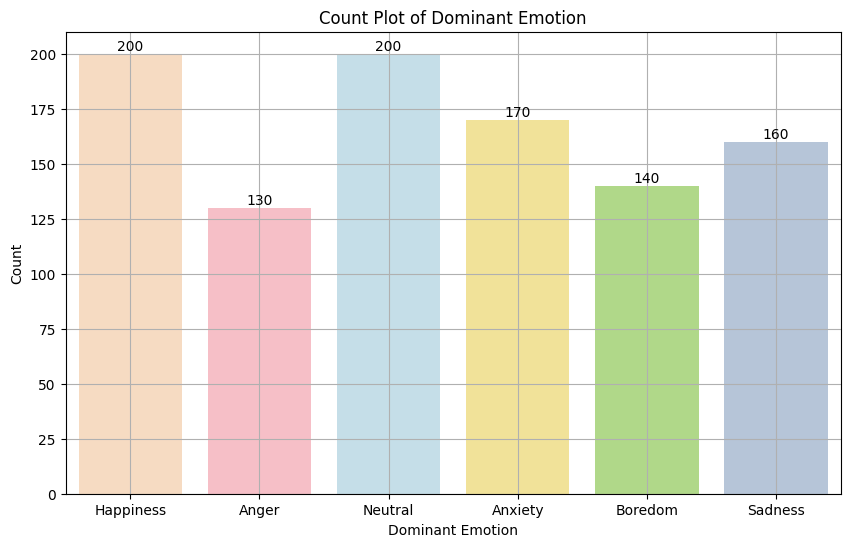

In [ ]:
categorical_columns = training_data.select_dtypes(include=["object"]).columns.tolist()

for i in categorical_columns:
    plt.figure(figsize=(10, 6))
    if i == "Gender":
        ax = sns.countplot(data=training_data, x=i, palette=gender_palette, hue="Gender")
    elif i == "Platform":
        ax = sns.countplot(data=training_data, x=i, palette=platform_palette, hue="Platform")
    else:
        ax = sns.countplot(data=training_data, x=i, palette=emotion_palette, hue="Dominant_Emotion")
    name = i.replace("_", " ")
    plt.title(f"Count Plot of {name}")
    plt.xlabel(name)
    plt.ylabel("Count")
    plt.grid(True)
    for container in ax.containers:
        ax.bar_label(container, fmt="%d")
    plt.show()

### Gender Plots

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


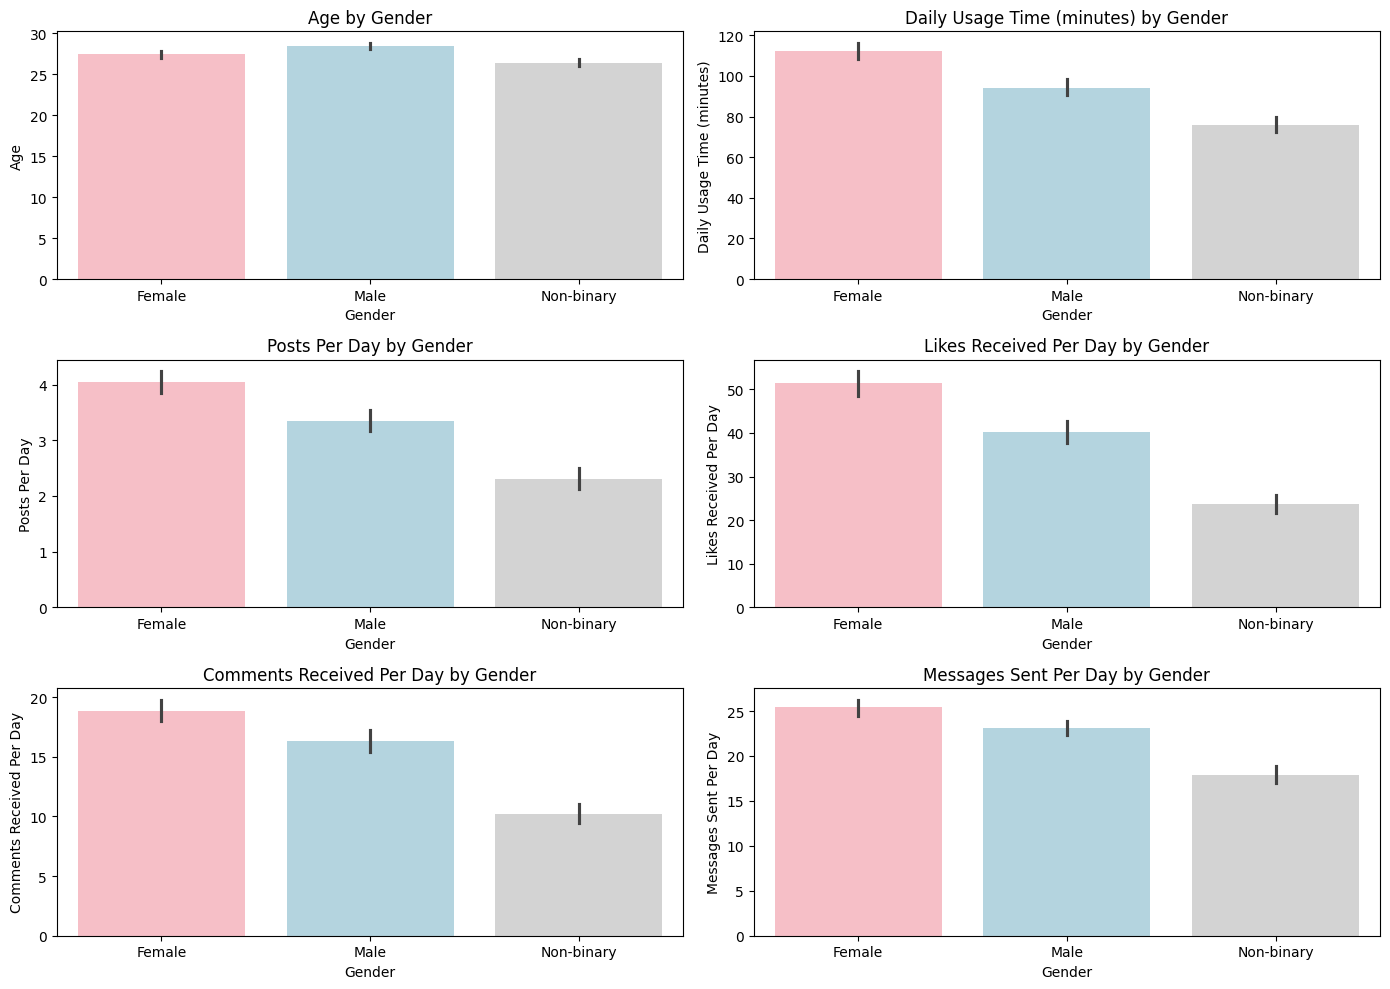

In [ ]:
num_rows = math.ceil(len(numerical_columns) / 2)

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14, 10))

axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.barplot(x="Gender", y=col, data=training_data, hue="Gender", palette=gender_palette, ax=axes[i])
    name = col.replace("_", " ")
    axes[i].set_title(f'{name} by Gender')
    axes[i].set_xlabel('Gender')
    axes[i].set_ylabel(name)

plt.tight_layout()
plt.show()

### Social Platform Plots

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


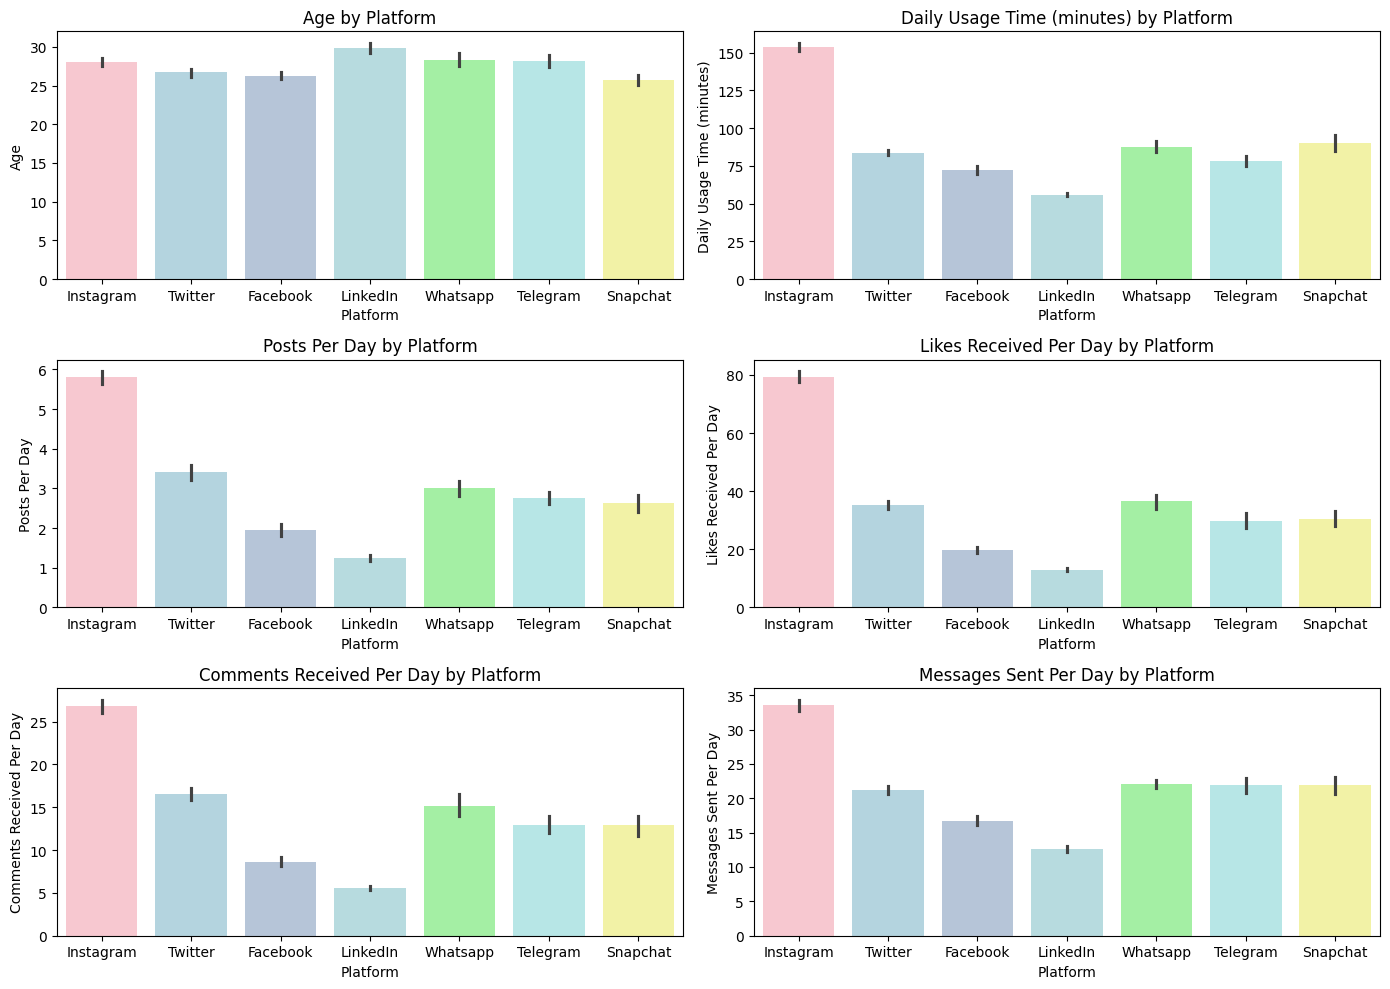

In [ ]:
num_rows = math.ceil(len(numerical_columns) / 2)

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14, 10))

axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.barplot(x="Platform", y=col, data=training_data, hue="Platform", palette=platform_palette, ax=axes[i])
    name = col.replace("_", " ")
    axes[i].set_title(f"{name} by Platform")
    axes[i].set_xlabel("Platform")
    axes[i].set_ylabel(name)

plt.tight_layout()
plt.show()

### Emotions Plots

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


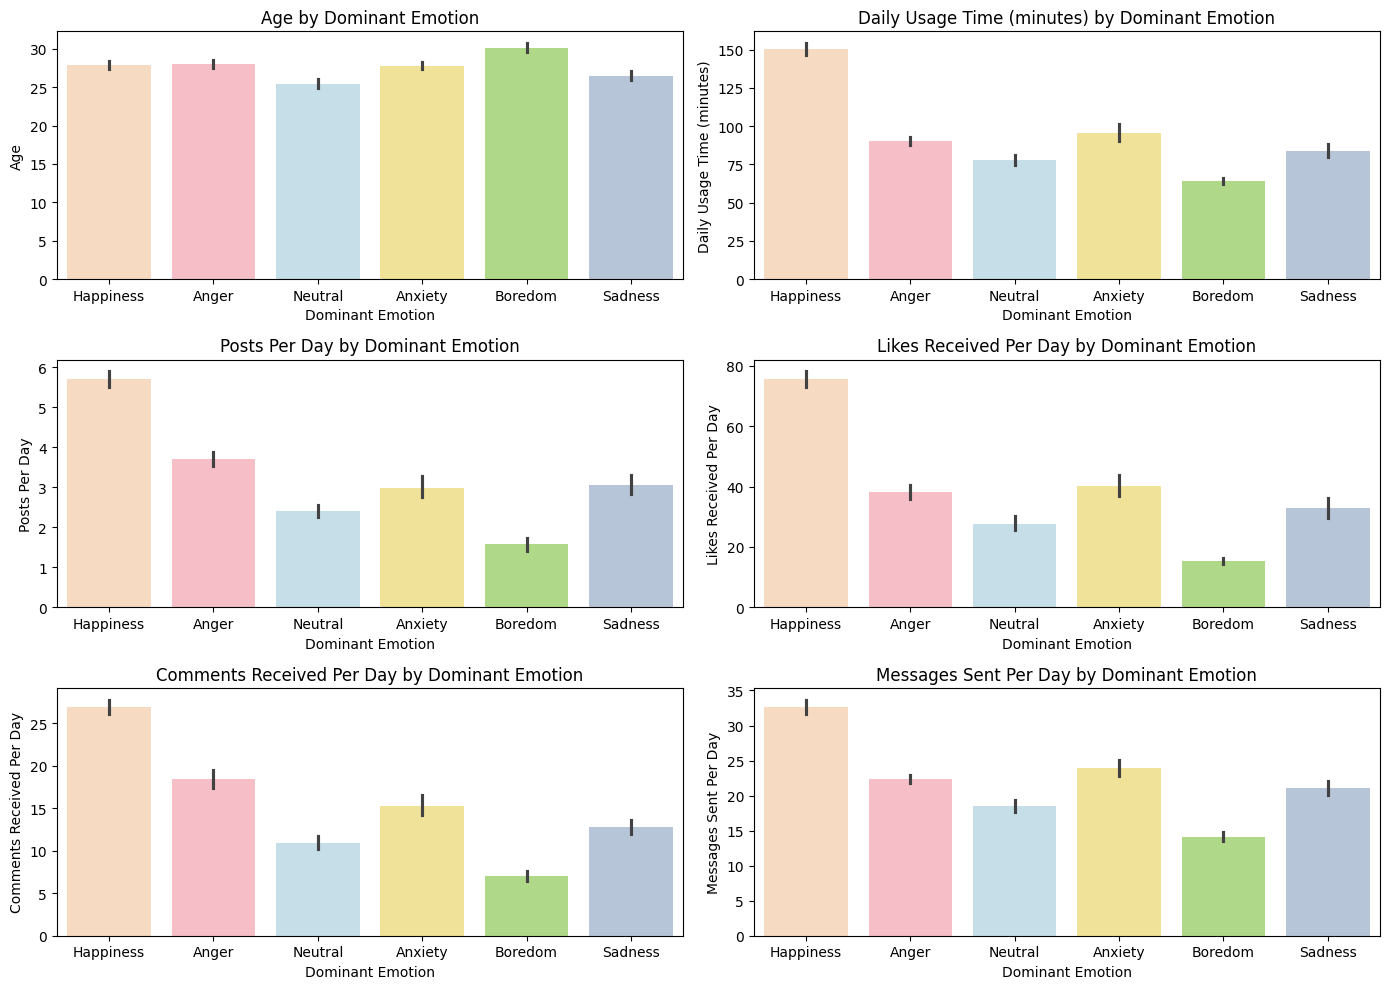

In [ ]:
num_rows = math.ceil(len(numerical_columns) / 2)

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14, 10))

axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.barplot(x="Dominant_Emotion", y=col, data=training_data, hue="Dominant_Emotion", palette=emotion_palette, ax=axes[i])
    name = col.replace("_", " ")
    axes[i].set_title(f'{name} by Dominant Emotion')
    axes[i].set_xlabel('Dominant Emotion')
    axes[i].set_ylabel(name)

plt.tight_layout()
plt.show()

### Emotions per Social

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


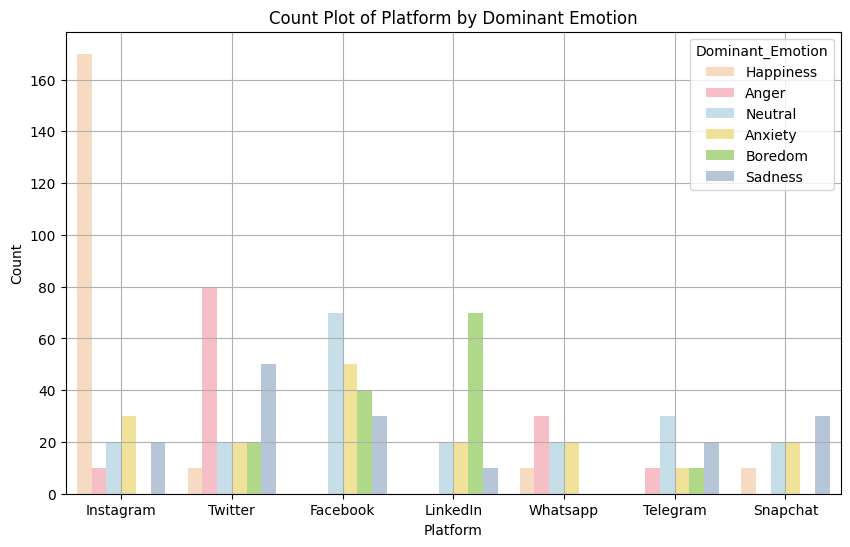

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=training_data, x="Platform", hue="Dominant_Emotion", palette=emotion_palette)
plt.title("Count Plot of Platform by Dominant Emotion")
plt.xlabel("Platform")
plt.ylabel("Count")
plt.grid(True)
plt.show()

### Heatmap

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


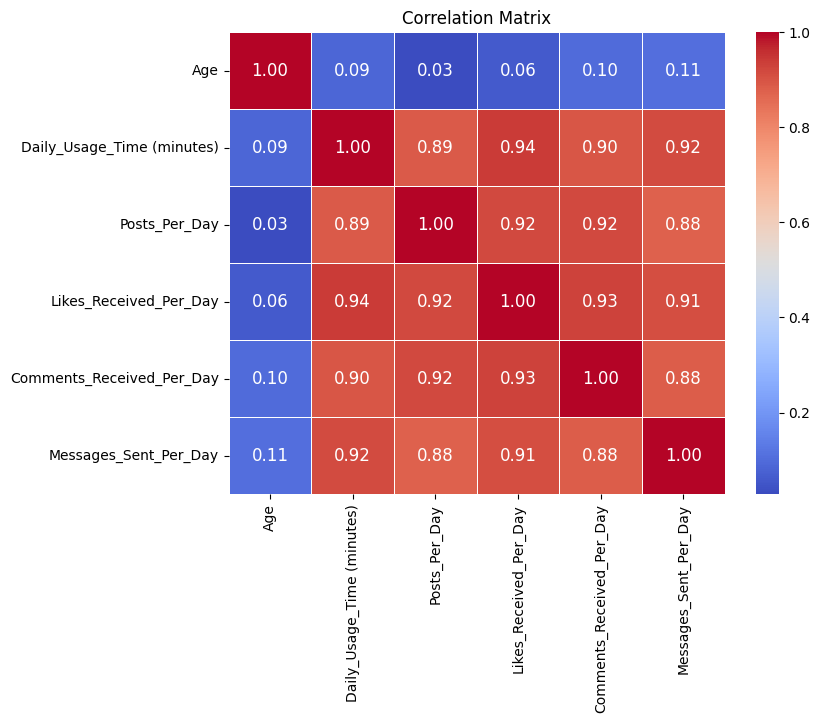

In [ ]:
corr = training_data.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 12})
plt.title("Correlation Matrix")
plt.show();

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


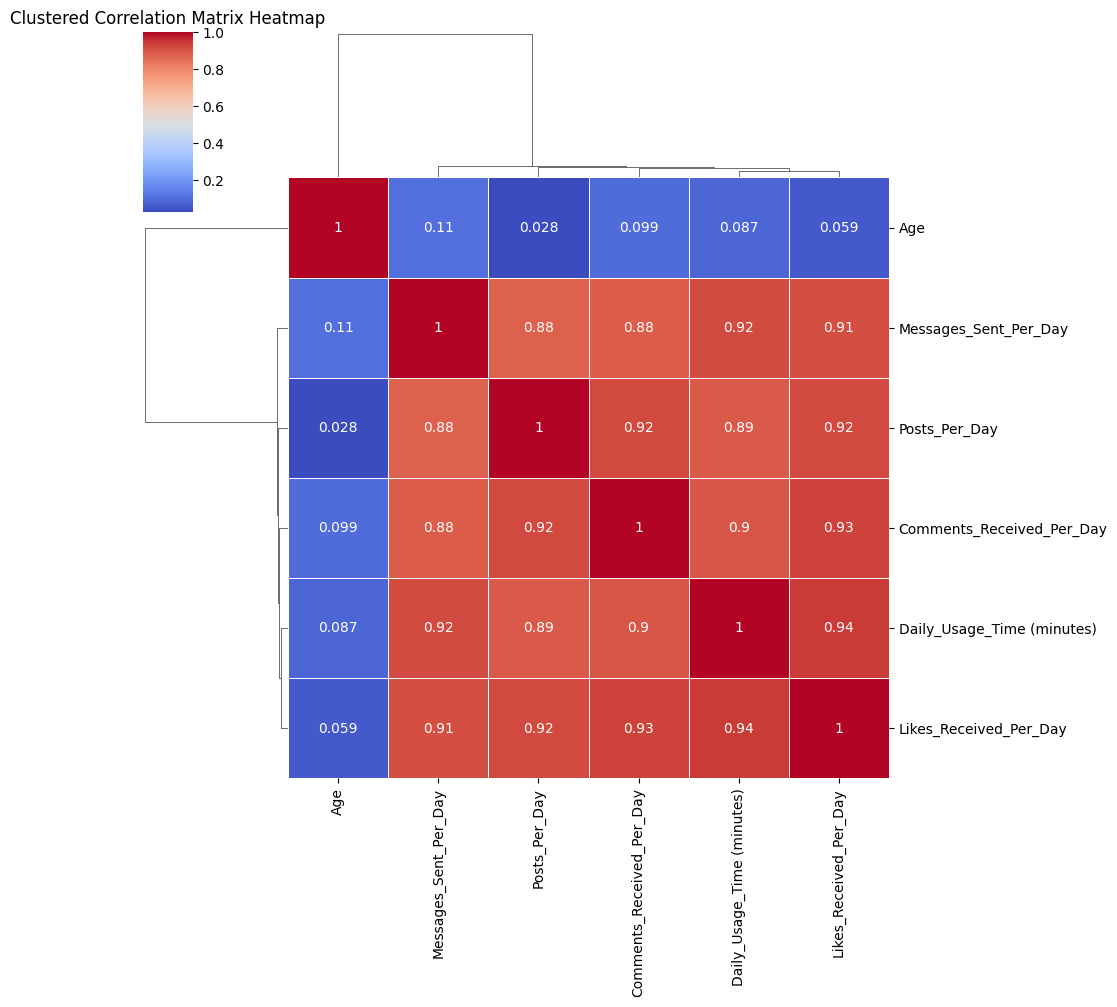

In [ ]:
sns.clustermap(training_data[numerical_columns].corr(), annot=True, cmap="coolwarm", linewidths=0.5, figsize=(10, 10))
plt.title("Clustered Correlation Matrix Heatmap")
plt.show();

### Pairplot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


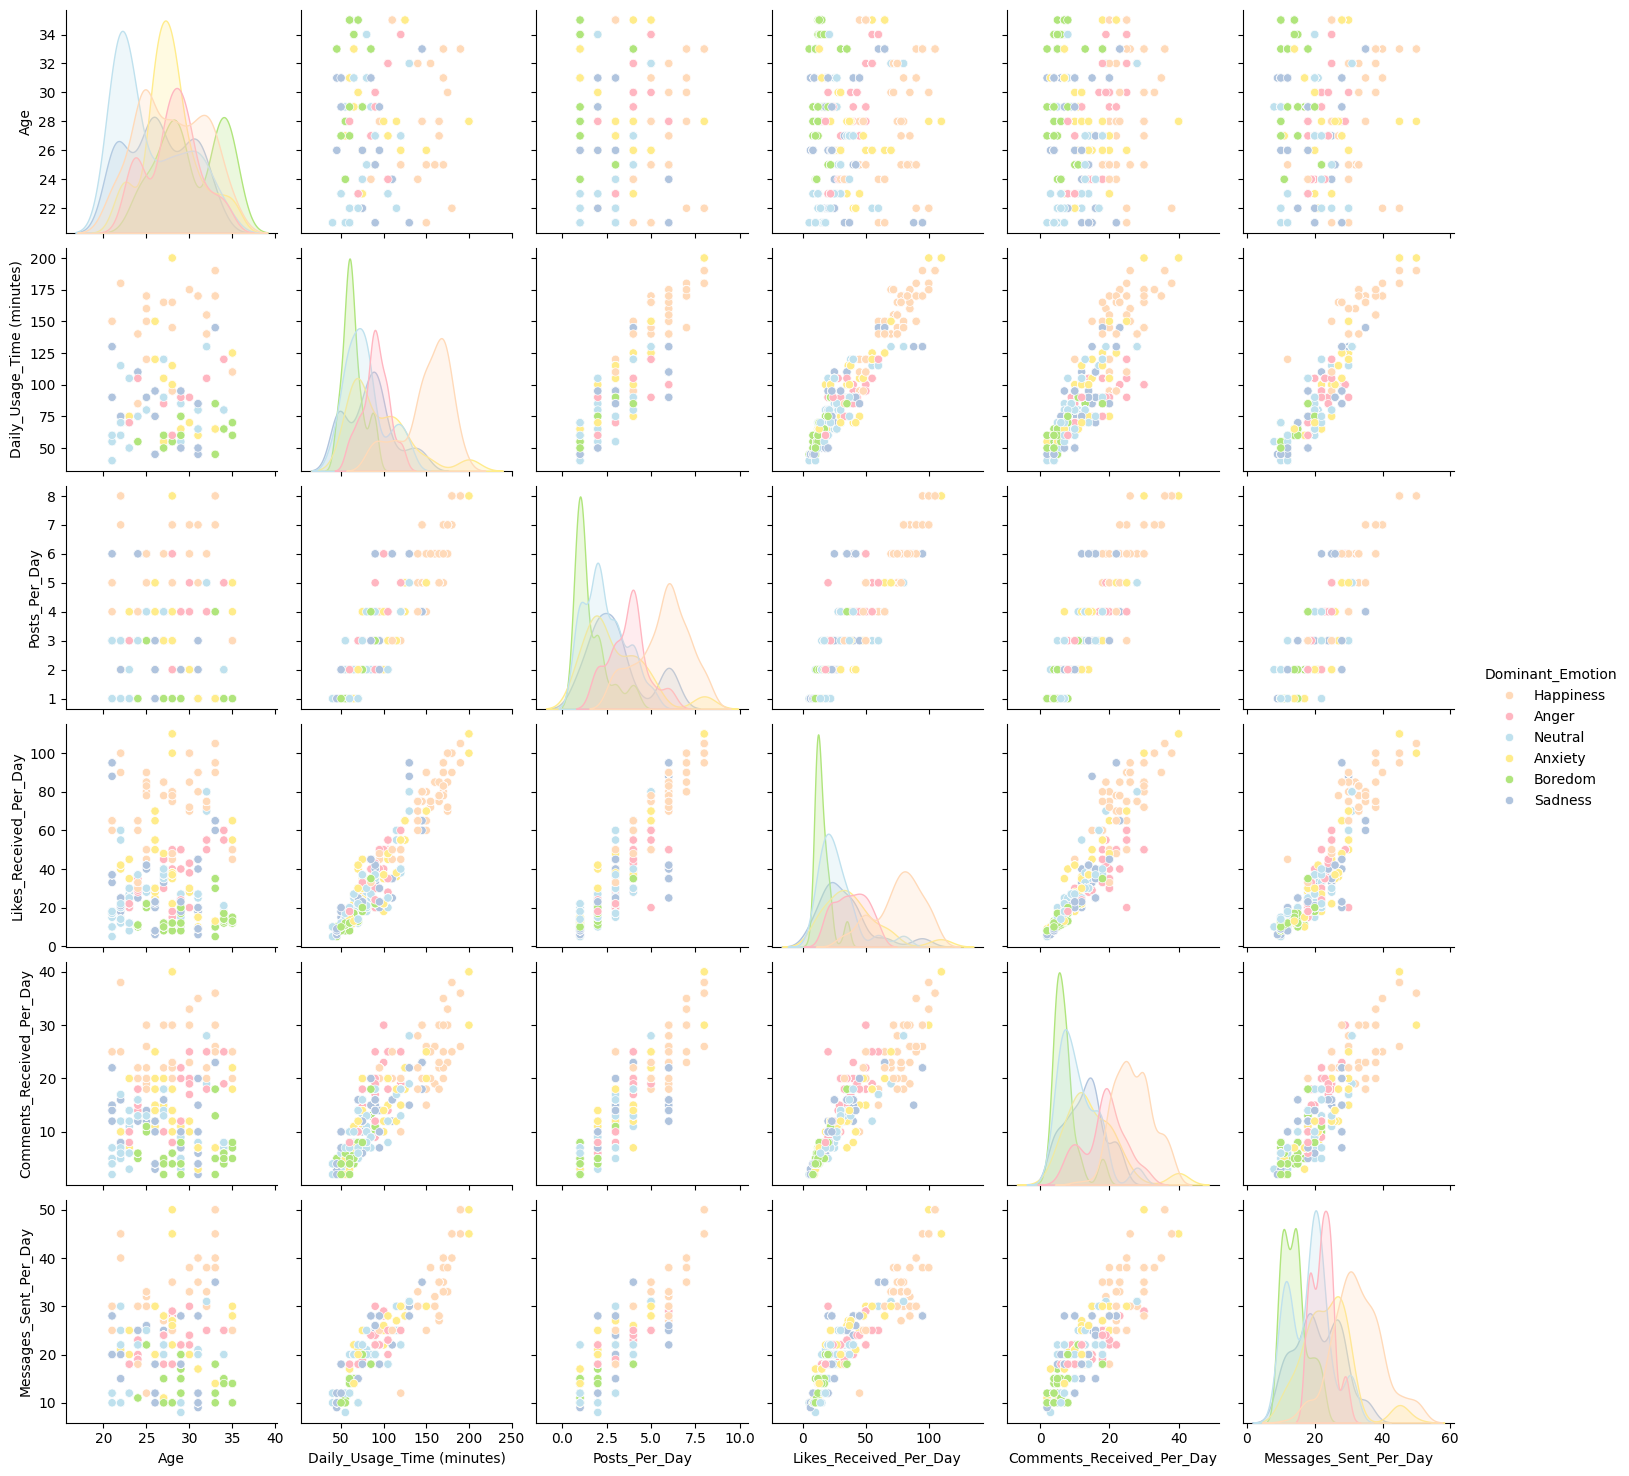

In [ ]:
sns.pairplot(training_data, hue='Dominant_Emotion', palette= emotion_palette)
plt.show()

## Data Preprocessing

### Training Data

In [ ]:
Training_X = training_data.drop("Dominant_Emotion", axis=1)
y_train = training_data["Dominant_Emotion"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
numeric_features = Training_X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = Training_X.select_dtypes(include=["object"]).columns

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="first"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
training_X_processed = preprocessor.fit_transform(Training_X)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
X_train = pd.DataFrame(training_X_processed, columns = preprocessor.get_feature_names_out())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
X_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,num__Age,num__Daily_Usage_Time (minutes),num__Posts_Per_Day,num__Likes_Received_Per_Day,num__Comments_Received_Per_Day,num__Messages_Sent_Per_Day,cat__Gender_Male,cat__Gender_Non-binary,cat__Platform_Instagram,cat__Platform_LinkedIn,cat__Platform_Snapchat,cat__Platform_Telegram,cat__Platform_Twitter,cat__Platform_Whatsapp
0,-0.638987,0.619350,-0.167745,0.193399,-0.636523,-1.240599,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.633896,-0.153228,0.877393,-0.754264,1.065106,0.874059,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.402717,-0.925806,-0.690313,-0.943797,-1.203732,-0.300751,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.124743,2.679559,2.445098,2.278259,1.632316,3.223679,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.397625,-1.312096,-1.212882,-1.322863,-1.544058,-1.475561,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.397625,-0.281991,0.354824,-0.185666,0.271013,-0.535713,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
996,-1.402717,-0.668280,-1.212882,-0.981704,-1.090290,-1.475561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,1.906779,0.361824,-0.167745,0.382932,1.065106,0.286654,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
998,0.124743,-0.925806,-0.690313,-0.830078,-0.863407,-0.535713,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


### Testing Data

In [ ]:
testing_data = pd.read_csv("/content/test.csv")
testing_data.dropna(inplace=True, axis=0)
testing_data.drop_duplicates(inplace=True)
testing_data.drop("User_ID", axis=1, inplace=True)
mask = testing_data["Age"].isin(["Female", "Male", "Non-binary"])
testing_data.loc[mask, ["Age", "Gender"]] = testing_data.loc[mask, ["Gender", "Age"]].values
testing_data = testing_data[testing_data.Gender != "Marie"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Testing_X = testing_data.drop("Dominant_Emotion", axis=1)
y_test = testing_data["Dominant_Emotion"]

testing_X_processed = preprocessor.transform(Testing_X)
X_test = pd.DataFrame(testing_X_processed, columns = preprocessor.get_feature_names_out())
X_test

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,num__Age,num__Daily_Usage_Time (minutes),num__Posts_Per_Day,num__Likes_Received_Per_Day,num__Comments_Received_Per_Day,num__Messages_Sent_Per_Day,cat__Gender_Male,cat__Gender_Non-binary,cat__Platform_Instagram,cat__Platform_LinkedIn,cat__Platform_Snapchat,cat__Platform_Telegram,cat__Platform_Twitter,cat__Platform_Whatsapp
0,-0.129834,0.619350,0.354824,0.003866,0.271013,-0.065789,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.657294,-0.925806,-1.212882,-0.830078,-0.976848,-1.240599,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.124743,0.490587,-0.167745,-0.071947,0.271013,0.521616,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.129834,0.233061,-0.167745,0.307119,0.497897,0.639097,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.657294,-1.054569,-0.167745,-0.867984,-0.976848,-1.240599,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,-0.129834,-0.153228,-0.167745,0.003866,0.044129,0.169173,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
94,-1.402717,-0.668280,-1.212882,-0.754264,-1.203732,-0.065789,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
95,1.397625,-0.281991,0.354824,-0.185666,0.271013,-0.535713,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
96,-0.893564,0.361824,1.399961,-0.185666,0.838222,0.286654,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Validation Data

In [ ]:
validation_data = pd.read_csv("/content/val.csv", on_bad_lines="skip")
validation_data.dropna(inplace=True, axis=0)
validation_data.drop_duplicates(inplace=True)
validation_data.drop("User_ID", axis=1, inplace=True)
mask = validation_data["Age"].isin(["Female", "Male", "Non-binary"])
validation_data.loc[mask, ["Age", "Gender"]] = validation_data.loc[mask, ["Gender", "Age"]].values
validation_data = validation_data[validation_data["Dominant_Emotion"] != "Agression"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Validation_X = validation_data.drop("Dominant_Emotion", axis=1)
y_val = validation_data["Dominant_Emotion"]

validation_X_processed = preprocessor.transform(Validation_X)
X_val = pd.DataFrame(validation_X_processed, columns = preprocessor.get_feature_names_out())
X_val

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,num__Age,num__Daily_Usage_Time (minutes),num__Posts_Per_Day,num__Likes_Received_Per_Day,num__Comments_Received_Per_Day,num__Messages_Sent_Per_Day,cat__Gender_Male,cat__Gender_Non-binary,cat__Platform_Instagram,cat__Platform_LinkedIn,cat__Platform_Snapchat,cat__Platform_Telegram,cat__Platform_Twitter,cat__Platform_Whatsapp
0,0.888472,1.906981,0.877393,1.520128,0.497897,1.461464,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.143049,1.520692,1.399961,1.330596,1.065106,1.813907,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.384411,-1.312096,-1.212882,-1.209143,-1.317174,-1.240599,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.124743,0.490587,-0.167745,-0.071947,0.271013,0.521616,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.124743,0.490587,-0.167745,-0.071947,0.271013,0.521616,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,-0.129834,-1.054569,-1.212882,-1.171236,-1.544058,-1.358080,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
132,-0.384411,-1.312096,-1.212882,-1.209143,-1.317174,-1.240599,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
133,0.379319,-1.054569,-0.690313,-0.943797,-1.203732,-1.475561,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
134,-1.657294,-0.539517,-0.690313,-0.564732,-0.296197,-0.418232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Cluster Analysis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


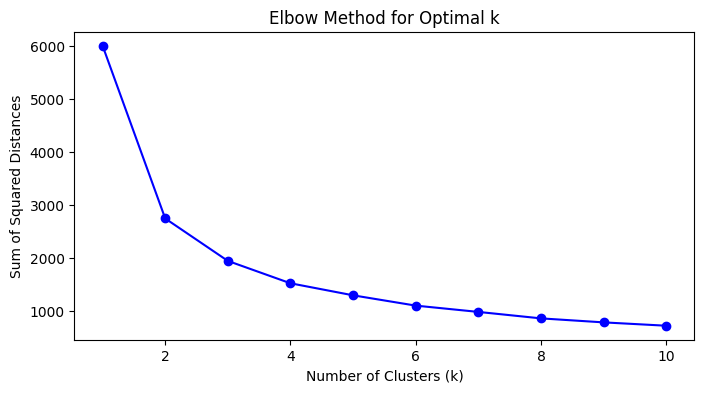

In [ ]:
numerical_clustering = X_train.iloc[:, :6].copy()
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=327)
    kmeans.fit(numerical_clustering)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, sse, "bo-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method for Optimal k")
plt.show()

### K-Means 2

In [ ]:
kmeans = KMeans(n_clusters = 2, n_init=10, random_state=327)
clusters = kmeans.fit_predict(numerical_clustering)

numerical_clustering["Cluster"] = clusters
cluster_analysis = numerical_clustering.groupby("Cluster").mean()
cluster_analysis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,num__Age,num__Daily_Usage_Time (minutes),num__Posts_Per_Day,num__Likes_Received_Per_Day,num__Comments_Received_Per_Day,num__Messages_Sent_Per_Day
Cluster,,,,,,
0,-0.104834,-0.521351,-0.477094,-0.529866,-0.489346,-0.464705
1,0.273628,1.360784,1.245266,1.383008,1.277247,1.212930


In [ ]:
numerical_clustering["Dominant_Emotion"] = y_train
cluster_vs_emotion = pd.crosstab(numerical_clustering["Cluster"], numerical_clustering["Dominant_Emotion"])
cluster_vs_emotion

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dominant_Emotion,Anger,Anxiety,Boredom,Happiness,Neutral,Sadness
Cluster,,,,,,
0,112,133,105,78,159,136
1,18,37,35,122,40,24


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


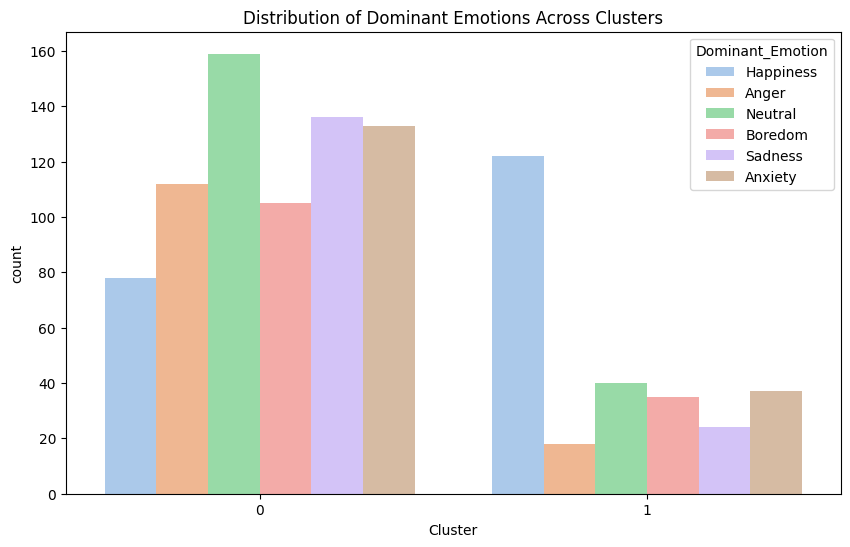

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=numerical_clustering, x="Cluster", hue="Dominant_Emotion", palette = "pastel")
plt.title("Distribution of Dominant Emotions Across Clusters")
plt.show()

### K-Means 6

In [ ]:
numerical_clustering_6 = X_train.iloc[:, :6].copy()
kmeans = KMeans(n_clusters = 6, n_init=10, random_state=327)
clusters = kmeans.fit_predict(numerical_clustering_6)

numerical_clustering_6["Cluster"] = clusters
cluster_analysis = numerical_clustering_6.groupby("Cluster").mean()
cluster_analysis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,num__Age,num__Daily_Usage_Time (minutes),num__Posts_Per_Day,num__Likes_Received_Per_Day,num__Comments_Received_Per_Day,num__Messages_Sent_Per_Day
Cluster,,,,,,
0,-1.163727,-0.661054,-0.671650,-0.652922,-0.681089,-0.702345
1,-0.197222,-0.009790,0.201127,-0.022612,0.190519,0.162262
2,0.532943,2.191148,2.183814,2.258652,2.164320,2.366877
3,0.708497,-0.855057,-0.935327,-0.881175,-0.971446,-0.846414
4,1.292966,0.782450,0.801910,0.901830,1.068888,0.836204
5,-0.531194,1.514892,1.202232,1.464122,1.127448,1.009532


In [ ]:
numerical_clustering_6["Dominant_Emotion"] = y_train
cluster_vs_emotion = pd.crosstab(numerical_clustering_6["Cluster"], numerical_clustering_6["Dominant_Emotion"])
cluster_vs_emotion

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dominant_Emotion,Anger,Anxiety,Boredom,Happiness,Neutral,Sadness
Cluster,,,,,,
0,21,35,21,23,59,37
1,65,61,9,40,52,45
2,0,7,13,32,6,0
3,26,43,75,20,55,54
4,18,15,4,27,20,6
5,0,9,18,58,7,18


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


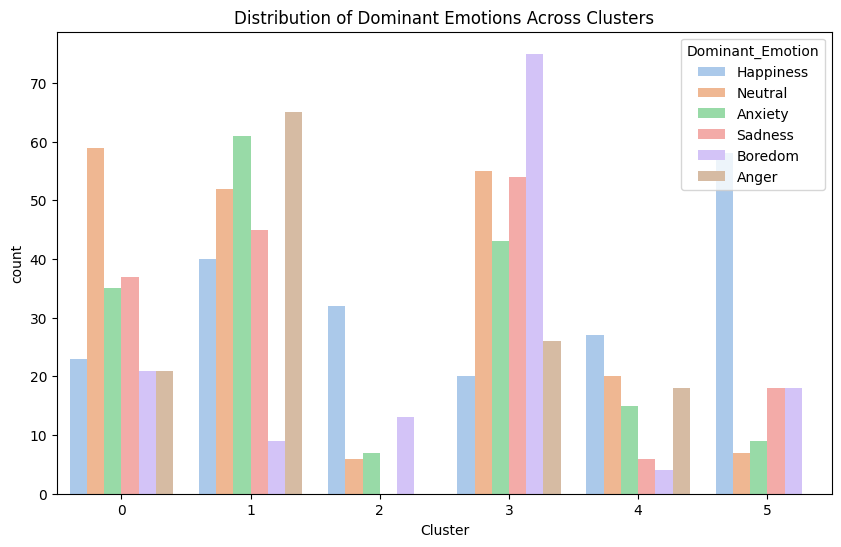

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=numerical_clustering_6, x="Cluster", hue="Dominant_Emotion", palette = "pastel")
plt.title("Distribution of Dominant Emotions Across Clusters")
plt.show()

# Modeling

### Linear Regression

In [ ]:
log_reg = LogisticRegression(max_iter=1000, random_state=327)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

balanced_accuracy = balanced_accuracy_score(y_val, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}\n")

report = classification_report(y_val, y_pred)
print("Classification Report:")
print(report)

conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.51

Balanced Accuracy: 0.52

Classification Report:
              precision    recall  f1-score   support

       Anger       0.54      0.64      0.58        11
     Anxiety       0.46      0.41      0.44        29
     Boredom       0.33      0.44      0.38        16
   Happiness       0.79      0.85      0.81        26
     Neutral       0.50      0.45      0.47        29
     Sadness       0.41      0.36      0.38        25

    accuracy                           0.51       136
   macro avg       0.50      0.52      0.51       136
weighted avg       0.51      0.51      0.51       136

Confusion Matrix:
[[ 7  1  1  0  0  2]
 [ 1 12  4  4  5  3]
 [ 1  3  7  1  3  1]
 [ 1  1  0 22  0  2]
 [ 1  1  8  1 13  5]
 [ 2  8  1  0  5  9]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=1000, random_state=327)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

balanced_accuracy = balanced_accuracy_score(y_val, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}\n")

report = classification_report(y_val, y_pred)
print("Classification Report:")
print(report)

conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.82

Balanced Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

       Anger       0.73      0.73      0.73        11
     Anxiety       0.83      0.86      0.85        29
     Boredom       1.00      0.75      0.86        16
   Happiness       0.88      0.85      0.86        26
     Neutral       0.81      0.90      0.85        29
     Sadness       0.69      0.72      0.71        25

    accuracy                           0.82       136
   macro avg       0.82      0.80      0.81       136
weighted avg       0.82      0.82      0.82       136

Confusion Matrix:
[[ 8  0  0  1  0  2]
 [ 0 25  0  0  1  3]
 [ 0  2 12  1  0  1]
 [ 1  1  0 22  1  1]
 [ 1  0  0  1 26  1]
 [ 1  2  0  0  4 18]]


### XGBoost

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

label_names = label_encoder.classes_

model = xgb.XGBClassifier(eval_metric='mlogloss')
model.fit(X_train, y_train_encoded)

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val_encoded, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

balanced_accuracy = balanced_accuracy_score(y_val_encoded, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}\n")

report = classification_report(y_val_encoded, y_pred, target_names=label_names)
print("Classification Report:")
print(report)

conf_matrix = confusion_matrix(y_val_encoded, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.79

Balanced Accuracy: 0.78

Classification Report:
              precision    recall  f1-score   support

       Anger       0.78      0.64      0.70        11
     Anxiety       0.88      0.79      0.84        29
     Boredom       0.88      0.88      0.88        16
   Happiness       0.81      0.85      0.83        26
     Neutral       0.81      0.86      0.83        29
     Sadness       0.63      0.68      0.65        25

    accuracy                           0.79       136
   macro avg       0.80      0.78      0.79       136
weighted avg       0.80      0.79      0.79       136

Confusion Matrix:
[[ 7  1  0  1  0  2]
 [ 0 23  0  1  1  4]
 [ 0  0 14  1  0  1]
 [ 0  0  1 22  1  2]
 [ 1  1  0  1 25  1]
 [ 1  1  1  1  4 17]]


## Hyperparameter Tuning

### Linear Regression


In [ ]:
param_dist = {
    "penalty": ["l2", None],
    "C": np.logspace(-4, 0, 25),
}

log_reg = LogisticRegression(random_state=327, max_iter=1000)

random_search = RandomizedSearchCV(log_reg, param_distributions=param_dist, n_iter=20, cv=5, verbose=2, random_state=327, n_jobs=-1)

random_search.fit(X_train, y_train)

y_pred = random_search.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

balanced_accuracy = balanced_accuracy_score(y_val, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}\n")

report = classification_report(y_val, y_pred, target_names=training_data.Dominant_Emotion.unique())
print("Classification Report:\n")
print(report)

conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n")
print(conf_matrix)

tuning_lr = random_search.best_params_
print("Best Hyperparameters:\n")
print(tuning_lr)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Accuracy: 0.49

Balanced Accuracy: 0.48

Classification Report:

              precision    recall  f1-score   support

   Happiness       0.36      0.36      0.36        11
       Anger       0.43      0.45      0.44        29
     Neutral       0.32      0.44      0.37        16
     Anxiety       0.75      0.81      0.78        26
     Boredom       0.54      0.45      0.49        29
     Sadness       0.43      0.36      0.39        25

    accuracy                           0.49       136
   macro avg       0.47      0.48      0.47       136
weighted avg       0.50      0.49      0.49       136

Confusion Matrix:

[[ 4  3  2  0  0  2]
 [ 0 13  5  3  3  5]
 [ 1  3  7  1  3  1]
 [ 2  2  0 21  0  1]
 [ 2  1  7  3 13  3]
 [ 2  8  1  0  5  9]]
Best Hyperparameters:

{'penalty': None, 'C': 0.21544346900318823}


### Random Forest

In [ ]:
param_dist = {
    "n_estimators": np.logspace(1, 3, 3, dtype=int),
    "max_depth": [None] + list(np.arange(5, 21, 5)),
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf = RandomForestClassifier(random_state=327)

random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, cv=5, scoring="accuracy", random_state=327, n_jobs=-1)

random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_

y_pred = best_rf.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

balanced_accuracy = balanced_accuracy_score(y_val, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}\n")

report = classification_report(y_val, y_pred, target_names=training_data.Dominant_Emotion.unique())
print("Classification Report:")
print(report)

conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

tuning_rf = random_search.best_params_
print("Best Hyperparameters:\n")
print(tuning_rf)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.82

Balanced Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

   Happiness       0.73      0.73      0.73        11
       Anger       0.80      0.83      0.81        29
     Neutral       1.00      0.75      0.86        16
     Anxiety       0.88      0.88      0.88        26
     Boredom       0.81      0.90      0.85        29
     Sadness       0.72      0.72      0.72        25

    accuracy                           0.82       136
   macro avg       0.82      0.80      0.81       136
weighted avg       0.82      0.82      0.82       136

Confusion Matrix:
[[ 8  0  0  1  0  2]
 [ 0 24  0  0  2  3]
 [ 0  2 12  1  0  1]
 [ 1  2  0 23  0  0]
 [ 1  0  0  1 26  1]
 [ 1  2  0  0  4 18]]
Best Hyperparameters:

{'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}


### XGBoost

In [ ]:
param_dist = {
    "n_estimators": np.logspace(1, 3, 3, dtype=int),
    "max_depth": [3, 5, 7, 9, 11],
    "learning_rate": [0.001, 0.01, 0.1, 0.2],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9]
}

model = xgb.XGBClassifier(eval_metric="mlogloss")

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=20, cv=5, scoring="accuracy", random_state=327, n_jobs=-1)

random_search.fit(X_train, y_train_encoded)

best_model = random_search.best_estimator_

y_pred = best_model.predict(X_val)

accuracy = accuracy_score(y_val_encoded, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

balanced_accuracy = balanced_accuracy_score(y_val_encoded, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}\n")

report = classification_report(y_val_encoded, y_pred, target_names=label_names)
print("Classification Report:")
print(report)

conf_matrix = confusion_matrix(y_val_encoded, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

tuning_xgb = random_search.best_params_
print("Best Hyperparameters:\n")
print(tuning_xgb)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.82

Balanced Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

       Anger       0.80      0.73      0.76        11
     Anxiety       0.92      0.83      0.87        29
     Boredom       0.87      0.81      0.84        16
   Happiness       0.81      0.85      0.83        26
     Neutral       0.87      0.90      0.88        29
     Sadness       0.64      0.72      0.68        25

    accuracy                           0.82       136
   macro avg       0.82      0.81      0.81       136
weighted avg       0.82      0.82      0.82       136

Confusion Matrix:
[[ 8  0  0  1  0  2]
 [ 0 24  0  0  1  4]
 [ 0  0 13  1  0  2]
 [ 0  0  1 22  1  2]
 [ 1  1  0  1 26  0]
 [ 1  1  1  2  2 18]]
Best Hyperparameters:

{'subsample': 0.9, 'n_estimators': 100, 'max_depth': 11, 'learning_rate': 0.001, 'colsample_bytree': 0.7}


## Ensemble

### Voting Classifier

In [ ]:
base_models = [
    ("lr", LogisticRegression(random_state=327, max_iter=1000, penalty=tuning_lr["penalty"])),
    ("rf", RandomForestClassifier(random_state=327, **tuning_rf)),
    ("xgb", xgb.XGBClassifier(random_state=327, eval_metric="mlogloss", **tuning_xgb))
]

voting_clf = VotingClassifier(
    estimators=base_models,
    voting="hard"
)

voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

balanced_accuracy = balanced_accuracy_score(y_val, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}\n")

report = classification_report(y_val, y_pred, target_names=training_data.Dominant_Emotion.unique())
print("Classification Report:\n")
print(report)

conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n")
print(conf_matrix)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.79

Balanced Accuracy: 0.78

Classification Report:

              precision    recall  f1-score   support

   Happiness       0.67      0.73      0.70        11
       Anger       0.77      0.83      0.80        29
     Neutral       0.92      0.75      0.83        16
     Anxiety       0.88      0.85      0.86        26
     Boredom       0.83      0.86      0.85        29
     Sadness       0.68      0.68      0.68        25

    accuracy                           0.79       136
   macro avg       0.79      0.78      0.79       136
weighted avg       0.80      0.79      0.79       136

Confusion Matrix:

[[ 8  0  0  1  0  2]
 [ 0 24  0  0  2  3]
 [ 0  2 12  1  0  1]
 [ 2  1  0 22  0  1]
 [ 1  1  0  1 25  1]
 [ 1  3  1  0  3 17]]


### Stacking Classfier


In [ ]:
base_models = [
    ("lr", LogisticRegression(random_state=327, max_iter=1000, penalty = tuning_lr["penalty"])),
    ("rf", RandomForestClassifier(random_state=327, **tuning_rf)),
    ("xgb", xgb.XGBClassifier(random_state=327, eval_metric="mlogloss", **tuning_xgb))
]

meta_model = LogisticRegression(random_state=327)

stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

stacking_clf.fit(X_train, y_train)

y_pred = stacking_clf.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

balanced_accuracy = balanced_accuracy_score(y_val, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}\n")

report = classification_report(y_val, y_pred, target_names=training_data.Dominant_Emotion.unique())
print("Classification Report:\n")
print(report)

conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n")
print(conf_matrix)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.82

Balanced Accuracy: 0.79

Classification Report:

              precision    recall  f1-score   support

   Happiness       0.64      0.64      0.64        11
       Anger       0.75      0.83      0.79        29
     Neutral       0.92      0.75      0.83        16
     Anxiety       0.89      0.92      0.91        26
     Boredom       0.90      0.90      0.90        29
     Sadness       0.75      0.72      0.73        25

    accuracy                           0.82       136
   macro avg       0.81      0.79      0.80       136
weighted avg       0.82      0.82      0.82       136

Confusion Matrix:

[[ 7  1  1  0  0  2]
 [ 0 24  0  0  2  3]
 [ 0  2 12  1  0  1]
 [ 1  1  0 24  0  0]
 [ 1  0  0  2 26  0]
 [ 2  4  0  0  1 18]]


## Testing Set

In [ ]:
y_pred = best_model.predict(X_test)

y_test_encoded = label_encoder.transform(y_test)

accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}\n")

report = classification_report(y_test_encoded, y_pred, target_names=label_names)
print("Classification Report:\n")
print(report)

conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print("Confusion Matrix:\n")
print(conf_matrix)

Accuracy: 0.97

Balanced Accuracy: 0.97

Classification Report:

              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00         9
     Anxiety       1.00      0.95      0.98        21
     Boredom       0.93      0.93      0.93        15
   Happiness       0.93      1.00      0.97        14
     Neutral       1.00      1.00      1.00        25
     Sadness       0.93      0.93      0.93        14

    accuracy                           0.97        98
   macro avg       0.97      0.97      0.97        98
weighted avg       0.97      0.97      0.97        98

Confusion Matrix:

[[ 9  0  0  0  0  0]
 [ 0 20  0  1  0  0]
 [ 0  0 14  0  0  1]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 25  0]
 [ 0  0  1  0  0 13]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Feature Importance


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


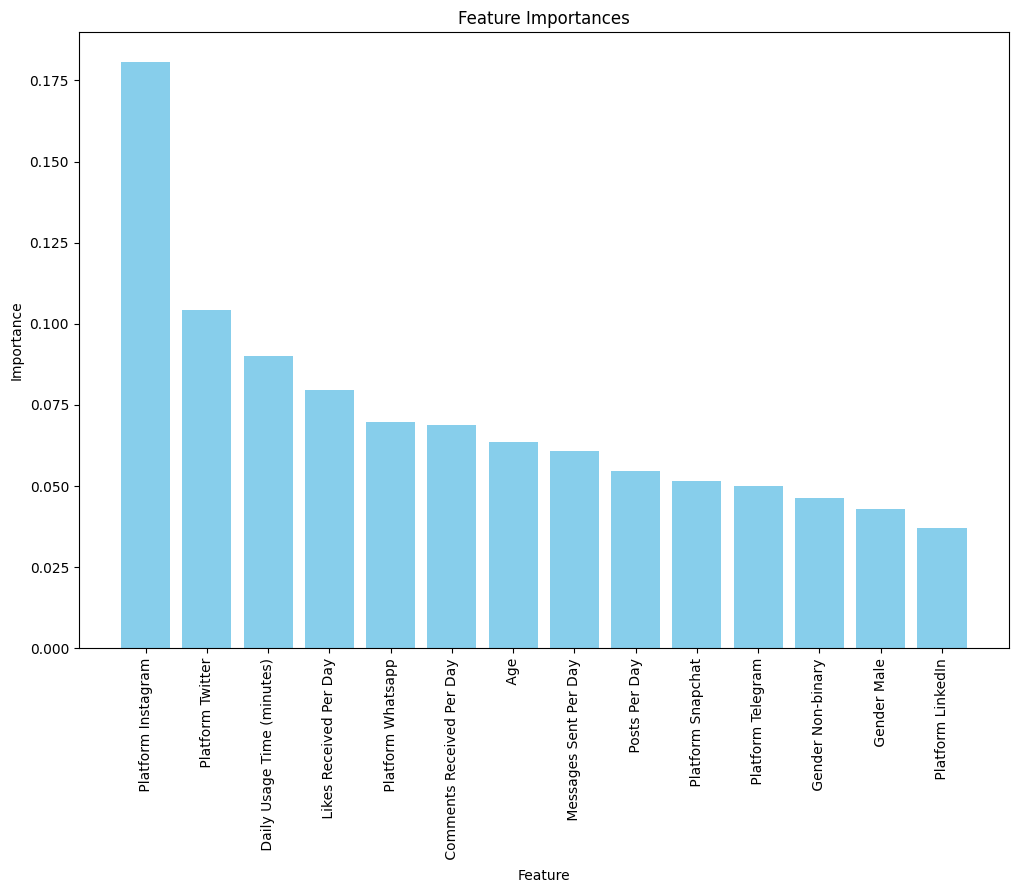

In [ ]:
feature_names = X_train.columns.str.replace("_", " ")
feature_names = feature_names.str[4:]

model = xgb.XGBClassifier(eval_metric="mlogloss", random_state=327, **tuning_xgb)
model.fit(X_train, y_train_encoded)

importances = model.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center", color="skyblue")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

Facebook and Female is the baseline.

# Association Rule Mining

In [ ]:
categorical_columns = training_data.select_dtypes(include=["object"]).columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoded_data = encoder.fit_transform(training_data[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
encoded_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Gender_Female,Gender_Male,Gender_Non-binary,Platform_Facebook,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp,Dominant_Emotion_Anger,Dominant_Emotion_Anxiety,Dominant_Emotion_Boredom,Dominant_Emotion_Happiness,Dominant_Emotion_Neutral,Dominant_Emotion_Sadness
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
996,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
frequent_itemsets = apriori(encoded_df, max_len=3, min_support=0.05, use_colnames=True)
frequent_itemsets.sort_values(by="support", ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.37,(Gender_Female)
1,0.36,(Gender_Male)
2,0.27,(Gender_Non-binary)
4,0.25,(Platform_Instagram)
14,0.20,(Dominant_Emotion_Neutral)
13,0.20,(Dominant_Emotion_Happiness)
8,0.20,(Platform_Twitter)
3,0.19,(Platform_Facebook)
11,0.17,(Dominant_Emotion_Anxiety)
42,0.17,"(Platform_Instagram, Dominant_Emotion_Happiness)"


In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules = rules[rules["lift"] > 3]
rules_with_one_consequent = rules[rules["consequents"].apply(lambda x: len(x) == 1)]
rules_with_dominant_emotion = rules_with_one_consequent[rules_with_one_consequent["consequents"].apply(lambda x: any("Dominant_Emotion" in str(item) for item in x))]
rules_with_dominant_emotion.sort_values(by="confidence", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
67,"(Platform_Instagram, Gender_Male)",(Dominant_Emotion_Happiness),0.08,0.20,0.06,0.750000,3.750000,0.0440,3.200000,0.797101
52,(Platform_Instagram),(Dominant_Emotion_Happiness),0.25,0.20,0.17,0.680000,3.400000,0.1200,2.500000,0.941176
61,"(Platform_Instagram, Gender_Female)",(Dominant_Emotion_Happiness),0.16,0.20,0.10,0.625000,3.125000,0.0680,2.133333,0.809524
54,(Platform_LinkedIn),(Dominant_Emotion_Boredom),0.12,0.14,0.07,0.583333,4.166667,0.0532,2.064000,0.863636
73,"(Platform_Twitter, Gender_Male)",(Dominant_Emotion_Anger),0.11,0.13,0.05,0.454545,3.496503,0.0357,1.595000,0.802247
56,(Platform_Twitter),(Dominant_Emotion_Anger),0.20,0.13,0.08,0.400000,3.076923,0.0540,1.450000,0.843750
